In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fl = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(27648, 1000),
            nn.ReLU(),
            nn.Linear(1000, 100),
            nn.ReLU(),
            nn.Linear(100,2)
        )
        # self.conv_layers = nn.Sequential(
        #     nn.Conv2d(3, 3, 5),
        #     # nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2),
        #     nn.Conv2d(3, 3, 3),
        #     # nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2))
        # self.lin_layers = nn.Sequential(
        #     # nn.Flatten(),         
        #     nn.Linear(1452, 100),
        #     nn.ReLU(),
        #     nn.Linear(100,2),
        #     nn.Softmax(dim=2)
        # )

            

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.shape[0], -1)
        # x = self.fl(x)
        return self.lin_layers(x)

    def train(self, X_train, y_train, opt):
        crit = nn.CrossEntropyLoss()

        opt.zero_grad()
        out = self.forward(X_train)
        # print(y_train.shape)
        loss = crit(out, y_train)
        loss.backward()
        opt.step()

    def test(self, X_test, y_test):
        corr, total = 0, 0
        with torch.no_grad():
            out = self.forward(X_test)
            _, pred = torch.max(out.data, 1)
            total += y_test.size(0)
            corr += (pred == y_test).sum().item()
        accuracy = corr / total
        return accuracy

In [3]:
# import data
X_train = torch.load("processed/X_train_10000.pt")
y_train = torch.load("processed/Y_train_10000.pt").long()
X_test = torch.load("processed/X_test_10000.pt")
y_test = torch.load("processed/Y_test_10000.pt").long()

In [4]:
# normalise data to be between 0 and 1 (also changes them into floats, so * 8 in ram!)
X_train = (X_train / 255).double()
X_test = (X_test / 255).double()

In [6]:
import copy
epochs = 10
lr = 0.005
n = net().double()
# opt = torch.optim.Adam(n.parameters(), lr=  0.5)
opt = torch.optim.SGD(n.parameters(), lr = lr)
bs = 40

starting_params = copy.deepcopy(n.state_dict())

accuracies = np.zeros(epochs)
n_bat = math.ceil(X_train.size(0) / bs)
for e in range(epochs):
    # for b in range(n_bat):
    #     X_bat = X_train[b*bs:(b+1)*bs,...]
    #     y_bat = y_train[b*bs:(b+1)*bs]
    #     n.train(X_bat, y_bat, opt)
    n.train(X_train, y_train, opt)
    accuracies[e] = n.test(X_test, y_test)

RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 40627200000 bytes. Error code 12 (Cannot allocate memory)

In [29]:
starting_params

OrderedDict([('conv_layers.0.weight',
              tensor([[[[ 2.8877e-02, -1.2187e-03,  3.7166e-02, -1.5397e-02,  2.0078e-02],
                        [ 1.1238e-01,  1.4904e-02, -5.6236e-02,  5.5585e-02,  3.4092e-02],
                        [ 1.0816e-01, -1.6880e-02,  7.3981e-02,  2.3245e-02,  4.5177e-02],
                        [-5.5714e-02, -2.8775e-04,  3.1509e-03,  1.1459e-01, -2.5760e-03],
                        [ 5.0603e-02,  5.9113e-02, -6.3772e-02, -5.1460e-02,  8.3780e-02]],
              
                       [[-9.0593e-02,  8.7437e-02, -7.6303e-02,  1.1363e-01, -7.3244e-02],
                        [-1.0310e-01, -3.2267e-02,  9.2827e-02, -2.1913e-02,  8.2073e-02],
                        [ 3.1165e-02,  6.6347e-02, -9.2051e-02,  6.0310e-02, -9.3667e-02],
                        [-8.5700e-02, -1.6100e-02,  1.3944e-03, -9.9361e-02, -1.0418e-01],
                        [ 3.2710e-02,  2.4436e-02, -9.4154e-03, -2.2422e-02,  5.9513e-04]],
              
                    

In [30]:
n.state_dict()

OrderedDict([('conv_layers.0.weight',
              tensor([[[[ 3.8847e-01,  3.4794e-01,  3.8714e-01,  3.3205e-01,  3.9644e-01],
                        [ 4.4389e-01,  3.2961e-01,  2.6505e-01,  3.7597e-01,  3.9037e-01],
                        [ 4.5140e-01,  3.0831e-01,  4.0820e-01,  3.5078e-01,  4.1184e-01],
                        [ 3.0261e-01,  3.3138e-01,  3.4447e-01,  4.4523e-01,  3.6033e-01],
                        [ 4.1520e-01,  4.1542e-01,  3.1002e-01,  3.1236e-01,  4.5467e-01]],
              
                       [[ 7.7870e-02,  2.3507e-01,  7.0241e-02,  2.5560e-01,  1.1234e-01],
                        [ 2.4495e-02,  6.2042e-02,  1.9420e-01,  7.8308e-02,  2.3599e-01],
                        [ 1.7683e-01,  1.7936e-01,  3.3385e-02,  1.7533e-01,  7.8519e-02],
                        [ 8.2897e-02,  1.0974e-01,  1.4022e-01,  2.5273e-02,  6.6264e-02],
                        [ 2.0980e-01,  1.8888e-01,  1.7943e-01,  1.5335e-01,  1.8464e-01]],
              
                    

In [32]:
accuracies

array([0.4885, 0.4885, 0.4885, 0.4885, 0.4885, 0.4885, 0.4885, 0.4885,
       0.4885, 0.4885])

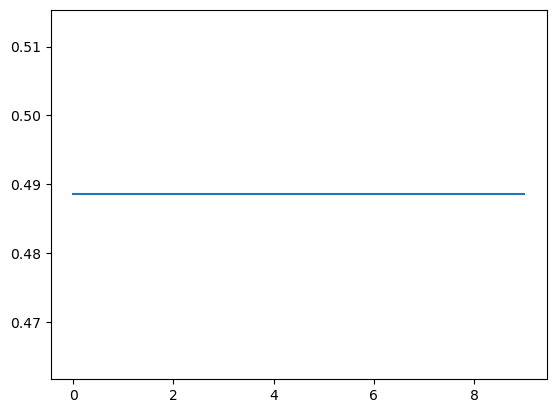

In [31]:
plt.plot(np.arange(epochs), accuracies)